## Importing Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

## Importing the Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Initial Understanding of the Data (Checks for Datatypes and Missing Values)

Now that the data has been loaded. Let's 

In [3]:
def initial_info(data):
    print("")
    print("---------------------------------------------------")
    print("")
    print("First five rows of Dataframe:")
    display(data.head())
    print("---------------------------------------------------")
    print("")
    print("Statistical information of Dataframe:")
    display(data.describe())
    print("---------------------------------------------------")
    print("")
    print("Identifying Datatypes and checking for null values:")
    print("")
    display(data.info())   

In [4]:
initial_info(df)


---------------------------------------------------

First five rows of Dataframe:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---------------------------------------------------

Statistical information of Dataframe:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


---------------------------------------------------

Identifying Datatypes and checking for null values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-nul

None

### Checking for Duplicates

We can see above that there are no nulls in the dataset. Let us check if there are any duplicate customer entries by checking the customerID column.

In [5]:
df['customerID'].nunique()

7043

There are 7043 unique values. Therefore we can be confident that there are no duplicates.

### Making sure all columns are the correct Datatype

Why is the **SeniorCitizen** column in *int64* format?

In [6]:
df['SeniorCitizen']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

In [7]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Seems like this column has been binarized into two categories: 1 or 0, with 1 indicating that the customer is a senior citizen. We can convert the datatype of this column into ***category***.

In [8]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

Let's check if the column datatype has been converted.

In [9]:
df['SeniorCitizen']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: category
Categories (2, int64): [0, 1]

We can see above that the dtype is now *category*.

Moving on, we can see that the **MonthlyCharges** column has *float64* datatype but the **TotalCharges** column is of *object* type. This will need to be fixed.

In [10]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

Since the values in this column were stored as string variables, there is a possibility that there are missing values not being recognized as nulls. These empty values could be stored as empty strings.

In [11]:
empty_total_charge_count = df.loc[df['TotalCharges']==' ', 'TotalCharges'].count()
print(f'Number of Records with missing Total Charges: {empty_total_charge_count}')

Number of Records with missing Total Charges: 11


It's good that we checked as we now found that 11 different records seem to have missing values. Is there a reason for why these records have missing values in the **TotalCharges** column?

The answer may lie in the **tenure** column. Let us observe the number of months that these customers have been customers.

In [12]:
df.loc[df['TotalCharges']==' ',['tenure','TotalCharges']]

,tenure,TotalCharges
488,0,
753,0,
936,0,
1082,0,
1340,0,
3331,0,
3826,0,
4380,0,
5218,0,
6670,0,


All of them have their **tenure** value as 0. Perhaps they have not completed their first month yet? Maybe they are on their free trial and therefore have not been billed yet?

Let us look at the total number of records in the dataset that have their **tenure** value = 0.

In [13]:
zero_tenure_count = len(df[df['tenure']==0])
print(f'The number of records with Tenure value as 0 is : {zero_tenure_count}')

The number of records with Tenure value as 0 is : 11


As we can see from above, there are 11 records in the entire dataframe with the **tenure** value equalling 0. This means that only the customers with missing **TotalCharges** have 0 months of subscription. Therefore, we can conclude in confidence that the missing values in the **TotalCharges** column is not because of a mistake. It is because they are likely in their trial period and have not been billed yet.

To deal with these missing values, we will us their monthly charge of these customers as their total charge.

In [14]:
df.loc[df['TotalCharges']==' ',['MonthlyCharges','TotalCharges']]

,MonthlyCharges,TotalCharges
488,52.55,
753,20.25,
936,80.85,
1082,25.75,
1340,56.05,
3331,19.85,
3826,25.35,
4380,20.00,
5218,19.70,
6670,73.35,


In [15]:
# Replacing missing values with monthly charge values
df.loc[df['TotalCharges']==' ','TotalCharges'] = df.loc[df['TotalCharges']==' ','MonthlyCharges']

#Converting the TotalCharges column to float64 dtype

df['TotalCharges'] = df['TotalCharges'].astype('float64')

Let us now check how many records have the same number of monthly and total charges.

In [16]:
len(df.loc[df['TotalCharges']== df['MonthlyCharges'],'tenure'])

624

The 11 records are all customers who previously had missing **TotalCharges**. This confirms that we have solved our missing values problem in this column.

## Exploratory Data Analysis

Let us take a look at all our columns again. This time we will learn more about the columns that have *object* datatype.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [18]:
def category_counts(df):

    cat_df = df.select_dtypes(include=['object','category']).drop(columns = 'customerID', axis = 1)
    n_cat_cols = len(cat_df.columns)

    fig, ax = plt.subplots(n_cat_cols,figsize=(10,140))


    for col_index in list(range(n_cat_cols)):

        x_ticks = [a+1 for a in list(range(len([a for a in cat_df.iloc[:,col_index].value_counts()])))]
        x_ticklabels = [a for a in cat_df.iloc[:,col_index].value_counts().keys()]
        y_values = [a for a in cat_df.iloc[:,col_index].value_counts()]
        bar_width = 0.8


        x_axis_label = cat_df.columns[col_index]
        y_axis_label = 'Value Counts'
        fig_title = f'{x_axis_label} Value Counts'


        ax[col_index].bar(x_ticks,y_values,bar_width,color='mediumpurple')

        ax[col_index].set_xticks(x_ticks)
        ax[col_index].set_xticklabels(x_ticklabels,fontsize=10)
        ax[col_index].set_xlabel(x_axis_label,fontsize=12)
        ax[col_index].set_ylabel(y_axis_label,fontsize=12)
        ax[col_index].set_title(fig_title,fontsize=20);

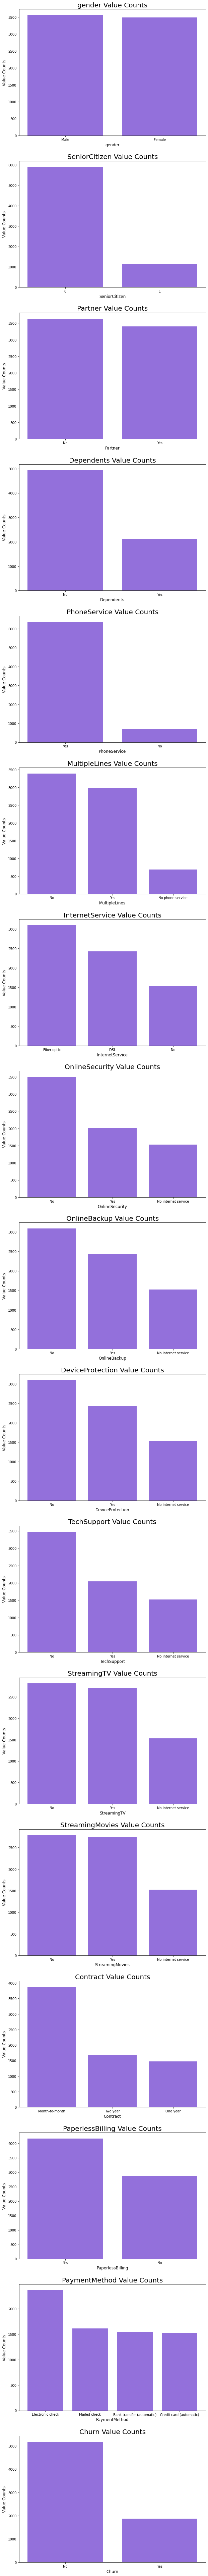

In [19]:
category_counts(df)

### Looking at Churned Customers

In [20]:
#Dataframe consisting of only churned customers
churn_df = df[df['Churn']=='Yes']

#Dataframe consisting of customers who have not churned
non_churn_df = df[df['Churn']=='No']

Using intuition, one may assume that the cost of the service may have a significant impact on a customer's decision on whether or not to continue their subscription. Let's look at a histogram of churned customers' **monthly** and **total** charges to see if we can find any insights to confirm this theory.

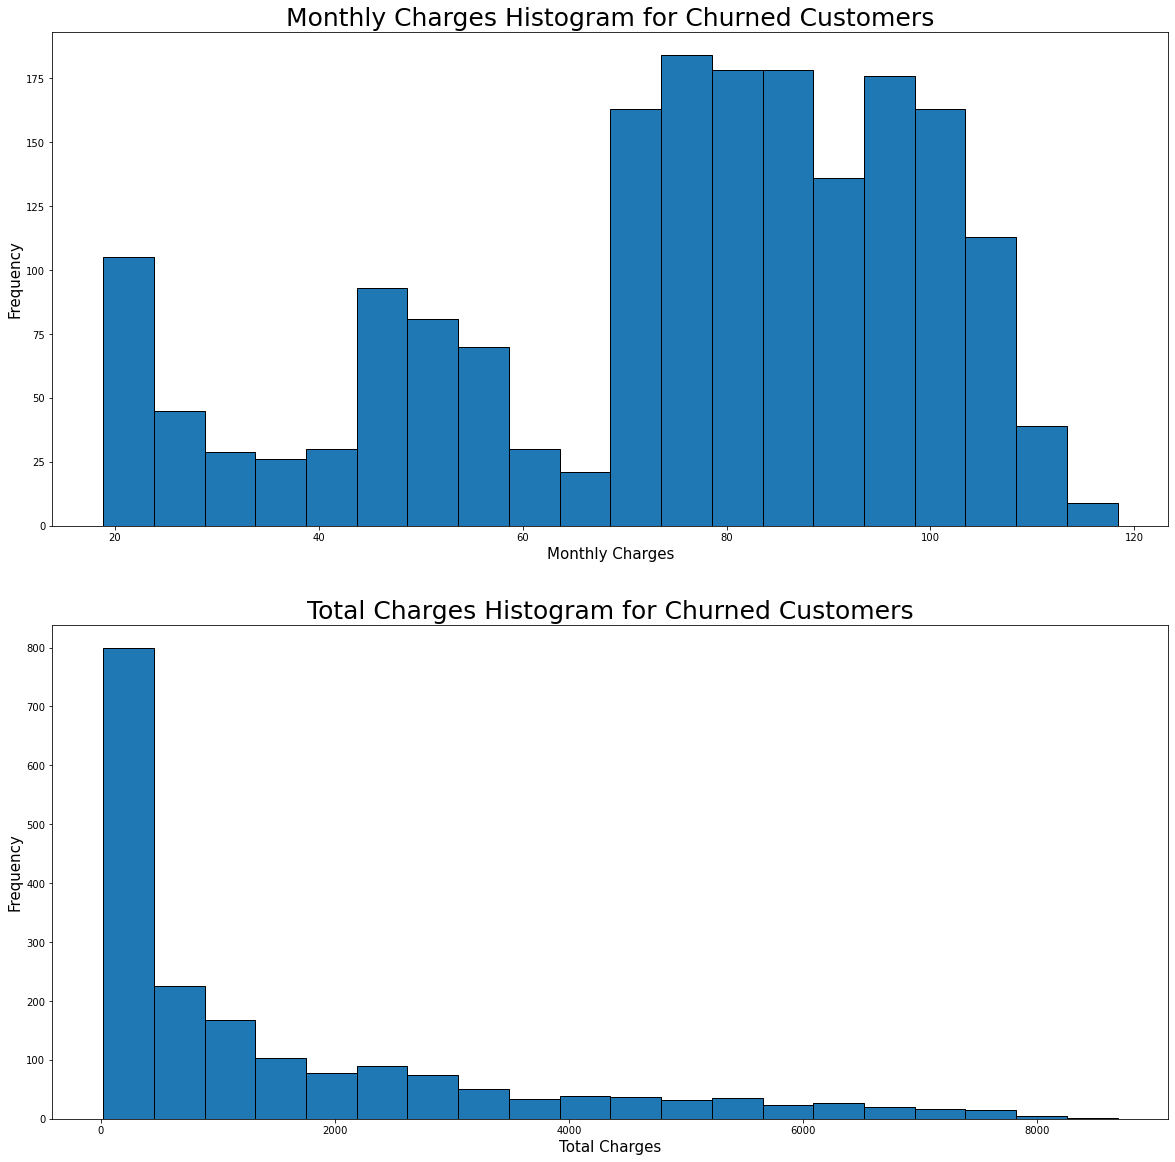

In [21]:
fig,ax = plt.subplots(2,figsize=(20,20))

ax[0].hist(churn_df['MonthlyCharges'],bins=20, edgecolor='black')
ax[1].hist(churn_df['TotalCharges'],bins=20, edgecolor='black')

ax[0].set_ylabel('Frequency', fontsize=15)
ax[0].set_xlabel('Monthly Charges',fontsize=15)
ax[0].set_title('Monthly Charges Histogram for Churned Customers', fontsize=25)
ax[1].set_ylabel('Frequency', fontsize=15)
ax[1].set_xlabel('Total Charges', fontsize=15)
ax[1].set_title('Total Charges Histogram for Churned Customers', fontsize=25);

We can see from the first histogram displaying **Monthly Charges** that customers paying higher monthly charges are churning more.

The **Total Charges** histogram is strongly skewed to the right. Seems like a lot of customers are churning within the initial period of their subscription.

### Hypothesis Test

To confirm the theory that **Monthly charges** are in fact a key factor in causing customer churn, we need to identify if there is a statistically significant difference between the monthly charges of churned customers and continuing customers.

Let us conduct a hypothesis test for this.

* **Alternative Hypothesis** : "There **is** a significant difference in monthly charges between churned and continuing customers.

* **Null Hypothesis** : "There **is NOT** a significant difference in monthly charges between churned and continuing customers.

In [22]:
churn_charges = churn_df['MonthlyCharges'].tolist()
non_churn_charges = non_churn_df['MonthlyCharges'].tolist()

In [23]:
alpha = 0.05

result = stats.ttest_ind(non_churn_charges, churn_charges, 
                      equal_var=False).pvalue

if result >= alpha:
    print('Fail to reject the null hypothesis')
else:
    print('Reject the null hypothesis')    

Reject the null hypothesis


Based on the result of the above test, we can confidently conclude that there is a significant difference in **Monthly Charges** between churned and continuing customers.

In [42]:
def compare_churn(column):

    fig, ax = plt.subplots(figsize = (20,12))

    all_group_count = df[column].value_counts()
    churn_group_count = churn_df[column].value_counts()

    all_y_values = all_group_count.tolist()
    x_labels = all_group_count.keys().tolist()
    x_ticks = list(range(len(x_labels)))

    churn_y_values = churn_group_count.tolist()

    ax.bar(x_ticks,all_y_values,label="All Customers",color='darkblue',edgecolor='black')
    ax.bar(x_ticks,churn_y_values,label="Churned Customers",color='darkorange',edgecolor='black')

    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels,fontsize=15)
    ax.set_xlabel(column,fontsize=20)
    ax.set_ylabel('Customer Count',fontsize=20)
    ax.set_title(f'Customer Churn comparison: {column}',fontsize=30)
    ax.legend(fontsize=20);
    
    count_df = pd.DataFrame(churn_df[column].value_counts())
    total = churn_df[column].value_counts().sum()
    count_df['% of Churned Customers'] = [f'{round((a/total)*100,2)}%' for a in count_df[column]]
    display(count_df)

,DeviceProtection,% of Churned Customers
No,1211,64.79%
Yes,545,29.16%
No internet service,113,6.05%


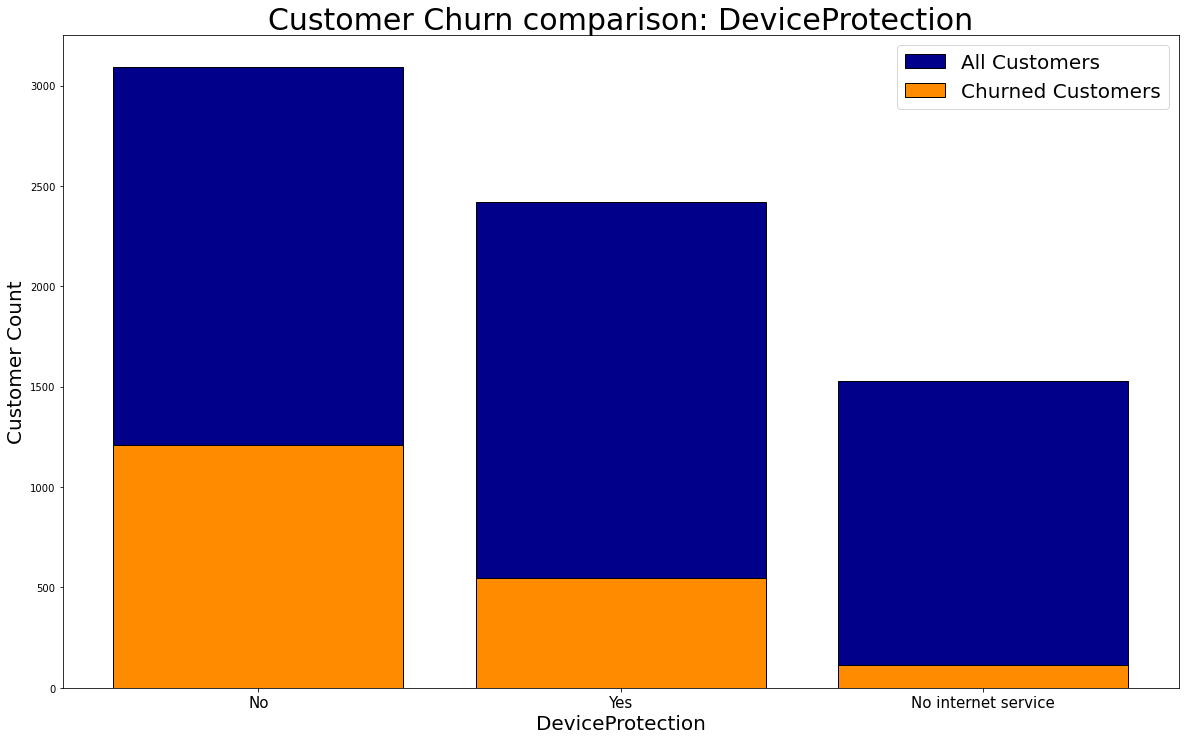

In [43]:
compare_churn('DeviceProtection')